<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/SW_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [38]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-13 16:37:27--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.38.158
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.38.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  71.9MB/s    in 2.7s    

2020-05-13 16:37:30 (71.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [39]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [40]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [41]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
#examine aisles - not useful
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
#examine departments - not useful
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
#examine order_products__prior
order_test = pd.read_csv('order_products__prior.csv')
print(order_test.shape)
order_test.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
#examine order_products__train
order_train = pd.read_csv('order_products__train.csv')
print(order_train.shape)
order_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
# examine orders
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()


(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
# examine products
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
#columns needed: product_id, product_name, add_to_cart_order
#dataframes needed: order_test, order_train, products

# reduce products to only used columns
products = products[['product_id','product_name']]
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce



These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk


In [0]:
#reduce products to top ten products
array = ['Banana','Bag of Organic Bananas','Organic Strawberries',
         'Organic Baby Spinach', 'Organic Hass Avocado','Organic Avocado',
        'Large Lemon', 'Strawberries', 'Limes','Organic Whole Milk']
products_10 =products.loc[products['product_name'].isin(array)]
products_10

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [0]:
#concatenate orders_test & orders_train
order_all = pd.concat([order_test, order_train], axis=0)
order_all

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [0]:
# reduce order_all to only columns needed
order_all = order_all[['product_id', 'add_to_cart_order']]
order_all

,product_id,add_to_cart_order
0,33120,1
1,28985,2
2,9327,3
3,45918,4
4,30035,5
...,...,...
1384612,14233,3
1384613,35548,4
1384614,35951,1
1384615,16953,2


In [0]:
 most_popular=pd.merge(order_all, products_10, on='product_id', how='inner')
 most_popular

,product_id,add_to_cart_order,product_name
0,21903,4,Organic Baby Spinach
1,21903,6,Organic Baby Spinach
2,21903,3,Organic Baby Spinach
3,21903,4,Organic Baby Spinach
4,21903,8,Organic Baby Spinach
...,...,...,...
2418309,26209,3,Limes
2418310,26209,2,Limes
2418311,26209,6,Limes
2418312,26209,22,Limes


In [0]:
most_popular['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [24]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [25]:
# table2 -> tidy2
#transpose table
table2.T'


,treatmenta,treatmentb
John Smith,NaN,2.0
Jane Doe,16.0,11.0
Mary Johnson,3.0,1.0


In [28]:
#melt to make new columns
tidy2 = table2.T.reset_index().melt(id_vars='index').rename(columns={
    'index' : 'name',
    'variable' : 'trt',
    'value' : 'result'
})
tidy2

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [29]:
# make names the index, shorten treatment names
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2 = tidy2.set_index('name')
tidy2

,trt,result
name,,
John Smith,a,NaN
Jane Doe,a,16.0
Mary Johnson,a,3.0
John Smith,b,2.0
Jane Doe,b,11.0
Mary Johnson,b,1.0


In [33]:
# tidy2 -> table2
wide = tidy2.pivot_table(index = 'name', columns='trt', values='result').T
wide

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


Begin working with flights data

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [34]:
import seaborn as sns
flights = sns.load_dataset('flights')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [36]:
pflights = flights.pivot_table(index = 'year', columns='month', values='passengers').T
pflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [37]:
# This is code to display a `.png` file inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
red_green = Image(url=url, width=600)

display(red_green)

The goal is to replicate the lecture, but use Pink Lady Apples &Mint Chip


In [0]:
# get datasets in origninal form
# products: product_id & product_name
# orders: order_id, order_hour_of_day
# order_products_train/prior: order_id, product_id,

In [0]:
products= pd.read_csv('products.csv')

orders = pd.read_csv('orders.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])

In [48]:
# get our products only
product_names = ['Mint Chip', 'Pink Lady Apples']

#reduce products dataframe
condition = products['product_name'].isin(product_names)
print (products.shape)

products2 = products[condition]
print(products2.shape)
products2

(49688, 4)
(2, 4)


,product_id,product_name,aisle_id,department_id
2360,2361,Mint Chip,37,1
3797,3798,Pink Lady Apples,24,4


In [56]:
# merge tables to get hour ordered, item & name, number ordered
pink_mint = (products2[['product_id','product_name']]
             .merge (order_products[['order_id', 'product_id']])
             .merge (orders[['order_id', 'order_hour_of_day']]))
print (pink_mint.shape)
pink_mint.head(3)

(11105, 4)


,product_id,product_name,order_id,order_hour_of_day
0,2361,Mint Chip,75,19
1,2361,Mint Chip,606,20
2,2361,Mint Chip,838,14


In [57]:
print(product_names)

['Mint Chip', 'Pink Lady Apples']


In [61]:
mint = pink_mint[pink_mint['product_name']== product_names[0]]
pink = pink_mint[pink_mint['product_name']== product_names[1]]
print(mint.shape)
print(pink.shape)

(5871, 4)
(5234, 4)


In [65]:
#make pivot table
pm =pink_mint.pivot_table(index ='order_hour_of_day',
                      columns = 'product_name',
                      values = 'order_id',
                      aggfunc=len)
pm


product_name,Mint Chip,Pink Lady Apples
order_hour_of_day,,
0,44,19
1,22,19
2,9,9
3,8,7
4,9,7
5,14,21
6,36,61
7,100,156
8,192,377


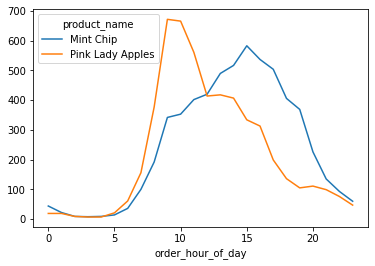

In [67]:
pm.plot();

In [68]:
# Reshape table
# make it wide, with percentages

wpm = pd.crosstab(pink_mint['order_hour_of_day'],
                  pink_mint['product_name'],
                  normalize=True)
wpm

product_name,Mint Chip,Pink Lady Apples
order_hour_of_day,,
0,0.003962,0.001711
1,0.001981,0.001711
2,0.000810,0.000810
3,0.000720,0.000630
4,0.000810,0.000630
5,0.001261,0.001891
6,0.003242,0.005493
7,0.009005,0.014048
8,0.017290,0.033949


In [71]:
#make it tidy
tpm=wpm.reset_index().melt(id_vars='order_hour_of_day').rename(columns={
    'order_hour_of_day':'Hour of Day Ordered',
    'product_name': 'Product',
    'value': '% of Orders by Product'
})

tpm.head(1)

,Hour of Day Ordered,Product,% of Orders by Product
0,0,Mint Chip,0.003962


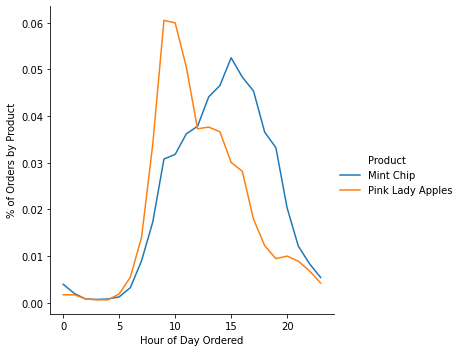

In [73]:
#seaborn plot while we are at it
sns.relplot(x = 'Hour of Day Ordered',
           y='% of Orders by Product',
           hue='Product',
           data=tpm,
           kind='line');

In [79]:
#pivot table because I need practice
# pflights = flights.pivot_table(index = 'year', columns='month', values='passengers').T
# pflights
p_tpm = tpm.pivot_table(index ='Product', columns ='Hour of Day Ordered', values='% of Orders by Product').T
p_tpm


Product,Mint Chip,Pink Lady Apples
Hour of Day Ordered,,
0,0.003962,0.001711
1,0.001981,0.001711
2,0.000810,0.000810
3,0.000720,0.000630
4,0.000810,0.000630
5,0.001261,0.001891
6,0.003242,0.005493
7,0.009005,0.014048
8,0.017290,0.033949
